In [2]:
import pandas as pd
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import statsmodels.api as sm

Populating the interactive namespace from numpy and matplotlib


In [3]:
datasetFurnace = pd.read_csv('furnace_data.csv',sep=',',encoding='utf-8')

In [4]:
datasetRaw = pd.read_csv('raw_material_data.csv',sep=',',encoding='utf-8')

In [6]:
datasetRaw.head().T

,0,1,2,3,4
Date,2019-01-01 23:00:00,2019-01-02 23:00:00,2019-01-03 02:00:00,2019-01-04 23:00:00,2019-01-05 23:00:00
Feature 1,89.5,89.3,89.31,89.39,89.63
Feature 2,85.06,84.32,84.39,84.6,84.87
Feature 3,95.039106,94.423292,94.491098,94.641459,94.689278
C Content,2.02,2.5,2.5,2.52,2.36
S Content,0.0054,0.0037,0.0017,0.0013,2.0
Feature 4,5.7276,6.4242,6.3468,6.1791,6.1404
Feature 5,6.85,6.94,2563.0,2556.0,2552.0


In [7]:
datasetFurnace.head().T

,0,1,2,3,4
ID,1,2,3,4,5
Grade,Grade_1,Grade_1,Grade_1,Grade_1,Grade_1
Raw Material 1,RawMaterialHot3,RawMaterialHot3,RawMaterialHot3,RawMaterialHot3,RawMaterialHot3
Raw Material 2,NaN,NaN,NaN,NaN,NaN
Charge Raw Material 99,22.0,NaN,15.0,NaN,NaN
Charge Raw Material 1,178486.0,167665.0,126579.0,149.36,149404.0
Charge Raw Material 2,NaN,NaN,NaN,NaN,NaN
Total Charge,200486.0,167665.0,141579.0,149.36,149404.0
Power Start,2019-01-01 05:58:30,2019-01-01 07:05:44,2019-01-01 07:57:36,2019-01-01 09:48:55,2019-01-01 10:35:11
Tap Weight,129.3,130.32,132.91,128.51,130.53


In [8]:
list(datasetRaw.columns)

['Date',
 'Feature 1',
 'Feature 2',
 'Feature 3',
 'C Content',
 'S Content',
 'Feature 4',
 'Feature 5']

In [9]:
datasetFurnace.columns[datasetFurnace.isnull().any()].tolist()

['Grade',
 'Raw Material 1',
 'Raw Material 2',
 'Charge Raw Material 99',
 'Charge Raw Material 1',
 'Charge Raw Material 2',
 'Total Charge',
 'Power Start',
 'Tap Weight',
 'Tap Time',
 'Last Temperature',
 'Tap Duration',
 'Liquid Metal Yield',
 'Gross Production',
 'Prime Production',
 'MS Yield',
 'Tap To Tap Time',
 'Power ON Time',
 'Power OFF Time',
 'Mins./Heat_Operation',
 'Energy Consumption kWh',
 'Power MW',
 'Total Energy Consumption kWh',
 'Natural Gas Nm³',
 'Natural Gas Nm³/t',
 'Oxygen Lancing Nm³',
 'Oxygen Burner Nm³',
 'Total Oxygen Nm³',
 'Oxygen Nm³/t',
 'Carbon Injection Kg',
 'Carbon Injection Kg/t',
 'LimeCC',
 'DoloCC',
 'Slag Analysis B2',
 'Slag Analysis B3',
 'Furnace First Temperature',
 'Raw Material Temperature',
 'Date']

In [10]:
datasetRaw.columns[datasetRaw.isnull().any()].tolist()

['Date',
 'Feature 1',
 'Feature 2',
 'Feature 3',
 'C Content',
 'S Content',
 'Feature 4',
 'Feature 5']

In [11]:
datasetRaw = datasetRaw.fillna(0)

In [12]:
datasetFurnace = datasetFurnace.fillna(0)

In [13]:
datasetRaw.head().T

,0,1,2,3,4
Date,2019-01-01 23:00:00,2019-01-02 23:00:00,2019-01-03 02:00:00,2019-01-04 23:00:00,2019-01-05 23:00:00
Feature 1,89.5,89.3,89.31,89.39,89.63
Feature 2,85.06,84.32,84.39,84.6,84.87
Feature 3,95.039106,94.423292,94.491098,94.641459,94.689278
C Content,2.02,2.5,2.5,2.52,2.36
S Content,0.0054,0.0037,0.0017,0.0013,2.0
Feature 4,5.7276,6.4242,6.3468,6.1791,6.1404
Feature 5,6.85,6.94,2563.0,2556.0,2552.0


In [14]:
datasetFurnace.head().T

,0,1,2,3,4
ID,1,2,3,4,5
Grade,Grade_1,Grade_1,Grade_1,Grade_1,Grade_1
Raw Material 1,RawMaterialHot3,RawMaterialHot3,RawMaterialHot3,RawMaterialHot3,RawMaterialHot3
Raw Material 2,0,0,0,0,0
Charge Raw Material 99,22.0,0.0,15.0,0.0,0.0
Charge Raw Material 1,178486.0,167665.0,126579.0,149.36,149404.0
Charge Raw Material 2,0.0,0.0,0.0,0.0,0.0
Total Charge,200486.0,167665.0,141579.0,149.36,149404.0
Power Start,2019-01-01 05:58:30,2019-01-01 07:05:44,2019-01-01 07:57:36,2019-01-01 09:48:55,2019-01-01 10:35:11
Tap Weight,129.3,130.32,132.91,128.51,130.53


In [15]:
# rawMaterial1 e rawMaterial3
rawMaterial1data = datasetFurnace.groupby('Raw Material 1')['Raw Material 1'].count()

In [16]:
rawMaterial1data

Raw Material 1
0                  1305
RawMaterialHot1    7853
RawMaterialHot3    7565
Name: Raw Material 1, dtype: int64

In [17]:
datasetFurnace['Raw Material 1'].value_counts()

RawMaterialHot1    7853
RawMaterialHot3    7565
0                  1305
Name: Raw Material 1, dtype: int64

In [18]:
datasetFurnace['Raw Material 2'].value_counts()

0                   12289
RawMaterialCold3     3050
RawMaterialCold1     1384
Name: Raw Material 2, dtype: int64

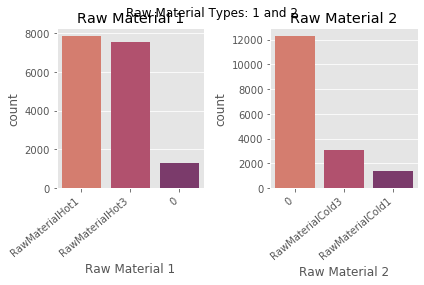

In [19]:
# Tipos de matéria prima

figure1, axes = plt.subplots(ncols=2)
figure1.suptitle('Raw Material Types: 1 and 2')

graph1 = sns.countplot(x='Raw Material 1', data=datasetFurnace, order = datasetFurnace['Raw Material 1'].value_counts().index, palette='flare',ax=axes[0])
axes[0].set_title('Raw Material 1')

graph2 = sns.countplot(x='Raw Material 2', data=datasetFurnace, order = datasetFurnace['Raw Material 2'].value_counts().index, palette='flare',ax=axes[1])
axes[1].set_title('Raw Material 2')

graph1.set_xticklabels(graph1.get_xticklabels(), rotation=40, ha="right")
graph2.set_xticklabels(graph2.get_xticklabels(), rotation=40, ha="right")

figure1.tight_layout()


In [20]:
# C e S correlacao semelhancas
df = datasetRaw.drop(columns = ['Feature 1','Feature 2','Feature 3', 'Feature 4', 'Feature 5'],axis=1)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,C Content,S Content
C Content,1.000000,0.041904
S Content,0.041904,1.000000


Text(0.5, 0, 'Content rate')

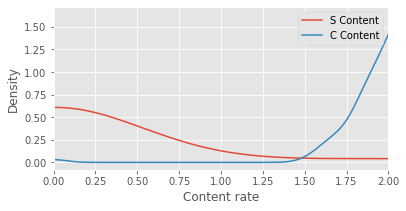

In [21]:
#plotando o grafico superior
datasetRaw.plot.density(y=['S Content', 'C Content'],xlim=[0,2],figsize=[6,3])
plt.xlabel("Content rate")

In [22]:
df1 = datasetFurnace.iloc[:, 36:38]

In [23]:
print(df1)

       Furnace First Temperature  Raw Material Temperature
0                         1605.0                     528.0
1                         1574.0                     509.0
2                         1610.0                     527.0
3                         1582.0                     516.0
4                         1560.0                     505.0
...                          ...                       ...
16718                     1601.0                     563.0
16719                     1601.0                     563.0
16720                     1604.0                     567.0
16721                     1612.0                     566.0
16722                     1577.0                     568.0

[16723 rows x 2 columns]


In [24]:
corr2 = df1.corr()
corr2.style.background_gradient(cmap='coolwarm')

,Furnace First Temperature,Raw Material Temperature
Furnace First Temperature,1.000000,0.001721
Raw Material Temperature,0.001721,1.000000


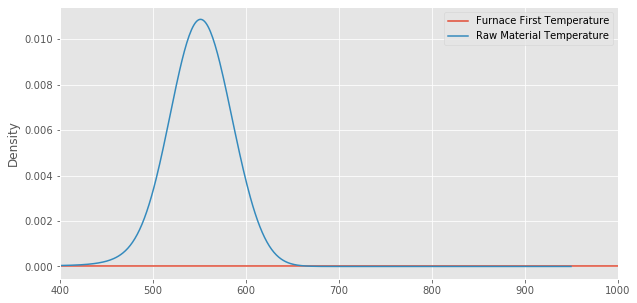

In [25]:
datasetFurnace.plot.density(y=['Furnace First Temperature', 'Raw Material Temperature'],xlim=[400,1000],figsize=[10,5])

In [26]:
#Describe dataset furnace
datasetFurnace.describe()

,ID,Charge Raw Material 99,Charge Raw Material 1,Charge Raw Material 2,Total Charge,Tap Weight,Last Temperature,Tap Duration,Liquid Metal Yield,Gross Production,...,Total Oxygen Nm³,Oxygen Nm³/t,Carbon Injection Kg,Carbon Injection Kg/t,LimeCC,DoloCC,Slag Analysis B2,Slag Analysis B3,Furnace First Temperature,Raw Material Temperature
count,16723.000000,16723.000000,16723.000000,16723.000000,16723.000000,16723.000000,16723.000000,16723.000000,16723.000000,16723.000000,...,16723.000000,16723.000000,16723.000000,16723.000000,16723.000000,16723.000000,16723.000000,16723.000000,1.672300e+04,16723.000000
mean,8362.000000,5.067572,115509.969447,118.874310,123153.361568,130.336501,1581.261137,171.241356,88.613260,100681.160570,...,4077.773799,52.689888,2242.097590,37.231113,2445.108571,5928.244860,0.703200,0.460784,2.468110e+03,503.945225
std,4827.658611,11.552146,54885.757739,3787.037771,56417.709676,3.887501,84.977601,61.719277,28.769069,55794.426969,...,586.636745,801.729761,635.459804,619.790948,1229.340544,2219.207189,15.109241,0.597558,1.165348e+05,154.443173
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.517000e+03,0.000000
25%,4181.500000,0.000000,113840.000000,0.000000,142953.500000,128.950000,1568.000000,130.800000,85.842198,116397.000000,...,3682.720000,28.198950,1775.000000,13.660043,1015.000000,4006.000000,0.000000,0.000000,1.551000e+03,528.000000
50%,8362.000000,0.000000,144129.000000,0.000000,147923.000000,130.810000,1585.000000,160.800000,87.805623,130052.000000,...,3990.160000,30.714723,2189.000000,16.775986,2506.000000,5934.000000,0.000000,0.000000,1.571000e+03,548.000000
75%,12542.500000,0.000000,149089.000000,4.940000,150531.000000,132.450000,1601.000000,201.000000,90.072386,133623.000000,...,4424.320000,33.940423,2570.500000,19.731778,3727.500000,8179.000000,1.397836,1.102949,1.590000e+03,565.000000
max,16723.000000,109.000000,194062.000000,153534.000000,211076.000000,149.850000,1671.000000,1609.800000,3220.930233,245982.000000,...,10745.400000,35264.000000,7514.000000,23336.000000,6697.000000,16469.000000,1952.000000,2.118431,1.507154e+07,633.000000


In [27]:
# Preparing the data 
X = datasetFurnace[['Charge Raw Material 1', 'Charge Raw Material 2']]
y = datasetFurnace['Energy Consumption kWh']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Charge Raw Material 1,-0.054951
Charge Raw Material 2,0.071416


In [40]:
y_pred = regressor.predict(X_test)

In [41]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
1235,55500.0,66631.426057
1624,57570.0,58336.502121
12926,60320.0,58490.750469
14635,56400.0,59013.314923
14764,56720.0,58738.910620
...,...,...
11764,52270.0,58843.129978
14821,57460.0,58663.407510
12352,54530.0,58441.239332
2206,60740.0,66631.366160


In [42]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) #erro absoluto
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4800.551344286822
Mean Squared Error: 53432768.80329218
Root Mean Squared Error: 7309.772144416827


In [43]:
#Analysis 2: preparation of data
X1 = datasetFurnace['Charge Raw Material 1'].values.reshape(-1,1)
y1 = datasetFurnace['Energy Consumption kWh'].values

In [44]:
from sklearn import linear_model
ols = linear_model.LinearRegression()
model = ols.fit(X1, y1)
response = model.predict(X1)

In [45]:
r2 = model.score(X1, y1)

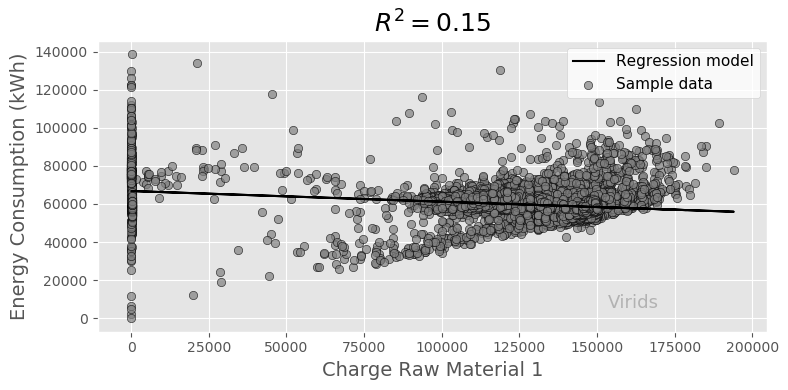

In [46]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X1, response, color='k', label='Regression model')
ax.scatter(X1, y1, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Energy Consumption (kWh)', fontsize=14)
ax.set_xlabel('Charge Raw Material 1', fontsize=14)
ax.text(0.8, 0.1, 'Virids', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()